<html>
<body>
    <div class="image-container" style="display: flex;">
        <img src="https://ufal.br/ufal/resolveuid/5ba5577fc45f41f48a6e8e9311488b28" alt="Image 1" style="width: 15%; height: auto;">
        <img src="https://ic.ufal.br/site-logo" alt="Image 2" style="width: 15%; height: auto;">
    </div>
   <h1 align="center"> Redes Neurais e Aprendizado Profundo - 2023.1 </h1>
   <h2 align="center"> Professor: Tiago Figueiredo Vieira </h2>
</body>
</html>

---

# Classification using Perceptrons

The following graph shows the distribution of samples (features $x_1$ and $x_2$) related to 2 (two) categories. With the Perceptron you developed using only Numpy, provide a model capable of reasonably classifying such samples. Obs: For training procedure, use files (which are represented by light red and cyan in the graph);

| Samples | Labels |
|---|---|
| X_train.npy | y_train.npy |

And for testing, use the following files (which are represented by dark blue and dark red in the graph):

| Samples | Labels |
|---|---|
| X_test.npy | y_test.npy |

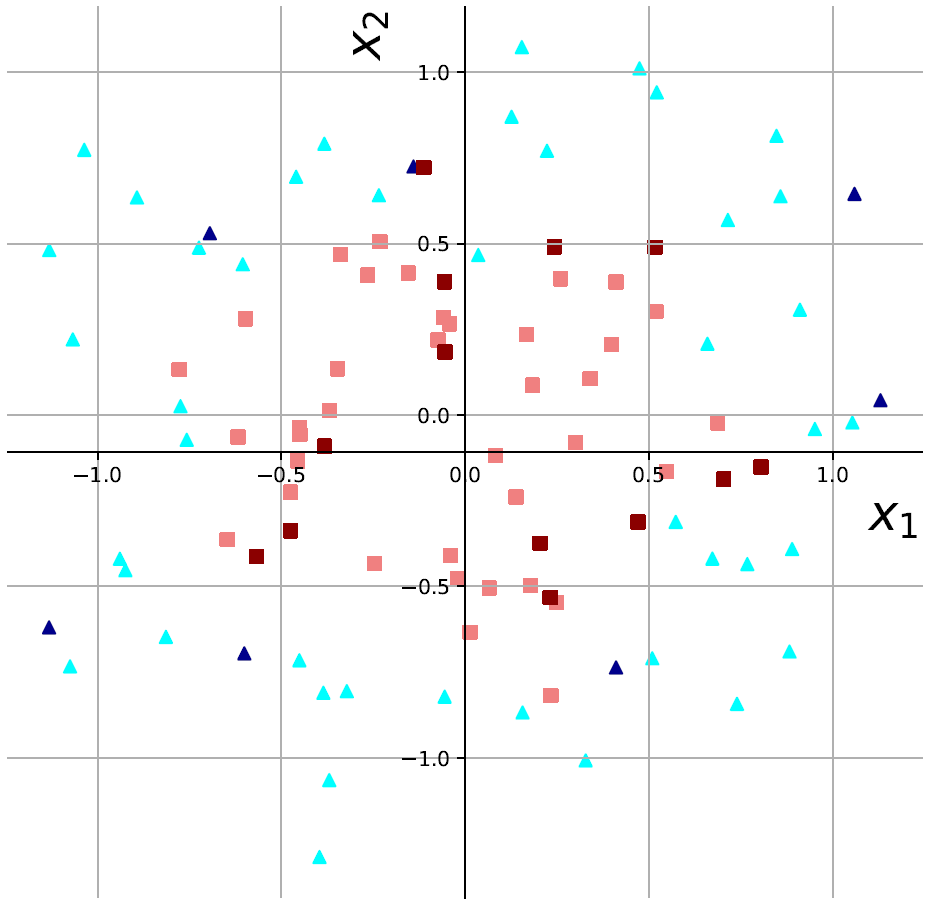

Inicial W: [0.98736193 0.45607205 0.79711347]
Final: [0.98736193 0.45607205 0.79711347]


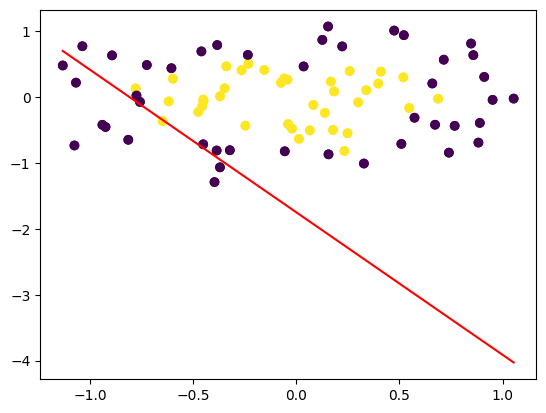

0.65


In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Load Files

X_train = np.load("X_train.npy")
y_train = np.load("y_train.npy")
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")

# Reshaping X
x_biased = X_train[:, np.newaxis, :]
new_X_train = np.concatenate((x_biased, np.ones((X_train.shape[0], 1, 1))), axis=2)

# Generating random weights using np random generator
rng = np.random
w = rng.random(3)
print(f"Inicial W: {w}")

# Defining learning rate and interations
LEARNING = 0.2
NUM_INTERATIONS = 20

# Perceptron
def sign(entrada):
    return 1 if entrada>0 else -1

def update(w_old,learning,label,y_pred,x):
    return w_old+(LEARNING*(label-y_pred)*x)

def perceptron(new_X_train,w,y):
    for time in range(NUM_INTERATIONS):
        for i,x in enumerate(new_X_train):
            label = y[i]
            x=x[0]
            y_pred = sign(np.dot(w,x))
            w = update(w,LEARNING,label,y_pred,x)
# Plot
def plot(w):
    print(f"Final: {w}")
    plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

    w1, w2, w3 = w

    x_line = np.linspace(np.min(X_train[:, 0]), np.max(X_train[:, 0]), num=100)
    y_line = (-w1 * x_line - w3) / w2

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)

    plt.plot(x_line, y_line, color='r')

    plt.show()

perceptron(new_X_train,w,y_train)
plot(w)

def predict(X_test, w):
    # reshaping test
    reshaped_x = X_test[:, np.newaxis, :]
    new_x_test = np.concatenate((reshaped_x, np.ones((X_test.shape[0], 1, 1))), axis=2)
    
    predicted_labels = []
    for x_test in new_x_test:
        dot_test = np.dot(w, x_test[0])
        y_pred_test = sign(dot_test)
        predicted_labels.append(y_pred_test)
    return np.array(predicted_labels)

predictions = predict(X_test, w)

def accuracy(predictions, y_test):
    classifications = len(y_test)
    correct_classifications = sum(p == r for p, r in zip(predictions, y_test))
    return correct_classifications / classifications

print(accuracy(predictions,y_test))
    

In [12]:
assert accuracy(predictions, y_test) > 0.55

In [13]:
assert accuracy(predictions, y_test) > 0.60